In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

Data scraped from [IMDb](https://www.imdb.com/):
- [Top 250 Movies](https://www.imdb.com/chart/top/)
- [Top 250 Shows](https://www.imdb.com/chart/toptv/)  

The dataset consists of the top 250 ranked shows & movie titles (mixed)

In [272]:
!head -n 5 imdb-titles.csv

Data scraped on 02-Mar-2022 17:13:06

id|category|title|director|actors|rating|users_rated|year|url
0111161|Movie|Τελευταία έξοδος: Ρίτα Χέιγουορθ|Frank Darabont |Tim Robbins, Morgan Freeman|9.2|2,551,917|1994|https://www.imdb.com/title/tt0111161/
0068646|Movie|Ο νονός|Francis Ford Coppola |Marlon Brando, Al Pacino|9.2|1,756,119|1972|https://www.imdb.com/title/tt0068646/


In [273]:
df = pd.read_csv("imdb-titles.csv", delimiter="|", skiprows=2, thousands=",")
df.head()

,id,category,title,director,actors,rating,users_rated,year,url
0,111161,Movie,Τελευταία έξοδος: Ρίτα Χέιγουορθ,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,2551917,1994,https://www.imdb.com/title/tt0111161/
1,68646,Movie,Ο νονός,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1756119,1972,https://www.imdb.com/title/tt0068646/
2,468569,Movie,Ο σκοτεινός ιππότης,Christopher Nolan,"Christian Bale, Heath Ledger",9.0,2503112,2008,https://www.imdb.com/title/tt0468569/
3,71562,Movie,"Ο νονός, μέρος 2ο",Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0,1217074,1974,https://www.imdb.com/title/tt0071562/
4,50083,Movie,Οι 12 ένορκοι,Sidney Lumet,"Henry Fonda, Lee J. Cobb",9.0,754211,1957,https://www.imdb.com/title/tt0050083/


# Data Cleaning  
___

The data is clean since it was scraped and formatted in a certain manner  
Some columns are cast to more appropriate data types

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   category     500 non-null    object 
 2   title        500 non-null    object 
 3   director     500 non-null    object 
 4   actors       500 non-null    object 
 5   rating       500 non-null    float64
 6   users_rated  500 non-null    int64  
 7   year         500 non-null    int64  
 8   url          500 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 35.3+ KB


In [275]:
df["id"] = df["id"].astype(np.object0)
df["rating"] = df["rating"].astype(np.float32)
df["users_rated"] = df["users_rated"].astype(np.uint32)
df["year"] = df["year"].astype(np.uint16)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    object 
 1   category     500 non-null    object 
 2   title        500 non-null    object 
 3   director     500 non-null    object 
 4   actors       500 non-null    object 
 5   rating       500 non-null    float32
 6   users_rated  500 non-null    uint32 
 7   year         500 non-null    uint16 
 8   url          500 non-null    object 
dtypes: float32(1), object(6), uint16(1), uint32(1)
memory usage: 28.4+ KB


# Exploration  
___

Text(0, 0.5, 'Titles')

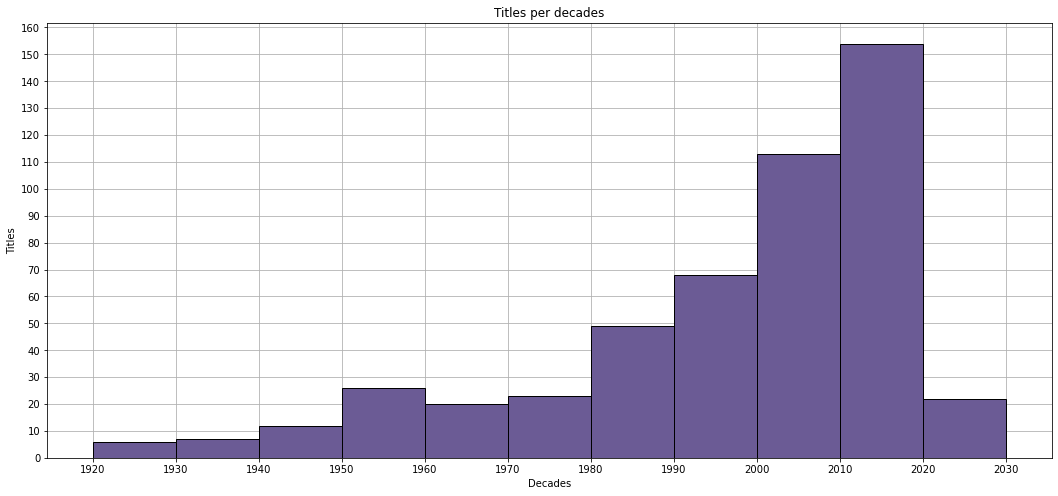

In [277]:
decades = range(1920, 2031, 10)

ax = df["year"].hist(figsize=(18, 8), zorder=3, bins=decades, color="#6b5b95", edgecolor="black")

ax.set_yticks(range(0, 161, 10))
ax.set_xticks(decades)
ax.set_title("Titles per decades")
ax.set_xlabel("Decades")
ax.set_ylabel("Titles")

Text(0, 0.5, 'Users rated')

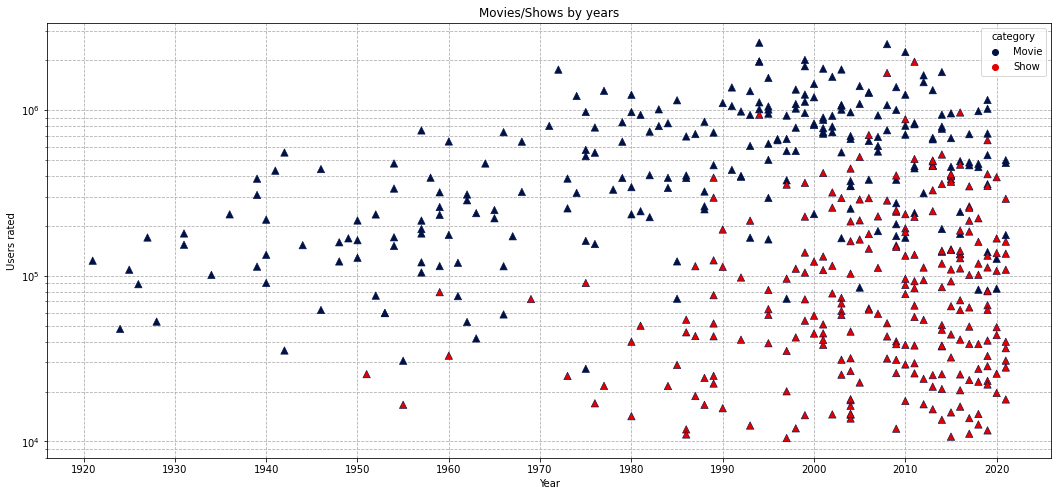

In [278]:
fig, ax = plt.subplots(figsize=(18, 8))

ax.grid(which="both", linestyle="--", zorder=0)
sns.scatterplot(data=df, x="year", y="users_rated", hue="category", palette=["#001146", "#e50000"],
                marker="^", s=55, zorder=3, edgecolor="#001146", ax=ax)

ax.set_yscale("log")
ax.set_xticks(ticks=np.arange(1920, 2023, 10))
ax.set_title("Movies/Shows by years")
ax.set_xlabel("Year")
ax.set_ylabel("Users rated")

- Each decade forward has more titles, just as the histogram suggested  
- Movies are evenly spread  
- Shows have become significantly more popular during the last 40 years

### Top 5 highest rated movies & shows respectively (# of users rated is taken into account)  
___

In [279]:
top_indexes = []
for category in df["category"].unique():
    top_indexes.extend(list(df.loc[df["category"] == category].sort_values(by=["users_rated", "rating"], ascending=[False, False]).index[:5]))
df.iloc[top_indexes]

,id,category,title,director,actors,rating,users_rated,year,url
0,111161,Movie,Τελευταία έξοδος: Ρίτα Χέιγουορθ,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,2551917,1994,https://www.imdb.com/title/tt0111161/
2,468569,Movie,Ο σκοτεινός ιππότης,Christopher Nolan,"Christian Bale, Heath Ledger",9.0,2503112,2008,https://www.imdb.com/title/tt0468569/
12,1375666,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt",8.7,2241008,2010,https://www.imdb.com/title/tt1375666/
11,137523,Movie,Fight Club,David Fincher,"Brad Pitt, Edward Norton",8.8,2009114,1999,https://www.imdb.com/title/tt0137523/
10,109830,Movie,Φόρεστ Γκαμπ,Robert Zemeckis,"Tom Hanks, Robin Wright",8.8,1969447,1994,https://www.imdb.com/title/tt0109830/
262,944947,Show,Παιχνίδι του στέμματος,-,"Emilia Clarke, Peter Dinklage",9.2,1958484,2011,https://www.imdb.com/title/tt0944947/
251,903747,Show,Breaking Bad,-,"Bryan Cranston, Aaron Paul",9.4,1675594,2008,https://www.imdb.com/title/tt0903747/
336,4574334,Show,Stranger Things,-,"Millie Bobby Brown, Finn Wolfhard",8.7,967852,2016,https://www.imdb.com/title/tt4574334/
292,108778,Show,Τα φιλαράκια,-,"Jennifer Aniston, Courteney Cox",8.8,938056,1994,https://www.imdb.com/title/tt0108778/
267,1475582,Show,Σέρλοκ,-,"Benedict Cumberbatch, Martin Freeman",9.0,881169,2010,https://www.imdb.com/title/tt1475582/


### Most popular actors  
___

The "actors" columns contains one to two actors starring in that movie/show  
A dictionary is used, with all unique actor names as keys, and their value will be the total times starred in a title

In [280]:
actor_pairs = list(df["actors"].unique())
actors = []
for pair in actor_pairs:
    actors.extend(pair.split(", "))
actors = dict.fromkeys(actors, 0)

In [281]:
for pair in df["actors"]:
    try:
        actor1, actor2 = pair.split(", ")
        actors[actor1] += 1
        actors[actor2] += 1
    except ValueError:
        # In this case there's only one actor
        actors[pair] += 1

Converting the dictionary to a DataFrame  
*Note*: dict comprehension because the values must be scalar, so they are cast to a single list each

In [282]:
actors = pd.DataFrame({keys:[values] for keys, values in actors.items()})
actors

,Tim Robbins,Morgan Freeman,Marlon Brando,Al Pacino,Christian Bale,Heath Ledger,Robert De Niro,Henry Fonda,Lee J. Cobb,Liam Neeson,...,Sofía Vergara,Robert Powell,Olivia Hussey,Öykü Karayel,Fatih Artman,Idris Elba,Dermot Crowley,Neil Patrick Harris,Gülse Birsel,Levent Üzümcü
0,1,3,3,4,5,1,9,3,1,1,...,1,1,1,1,1,1,1,1,1,1


Now the Datarame is melted down to 2 columns and renamed

In [283]:
actors = pd.melt(actors)
actors.columns = ["actor", "starred"]
actors.head()

,actor,starred
0,Tim Robbins,1
1,Morgan Freeman,3
2,Marlon Brando,3
3,Al Pacino,4
4,Christian Bale,5


Text(0.5, 0, 'Times starred')

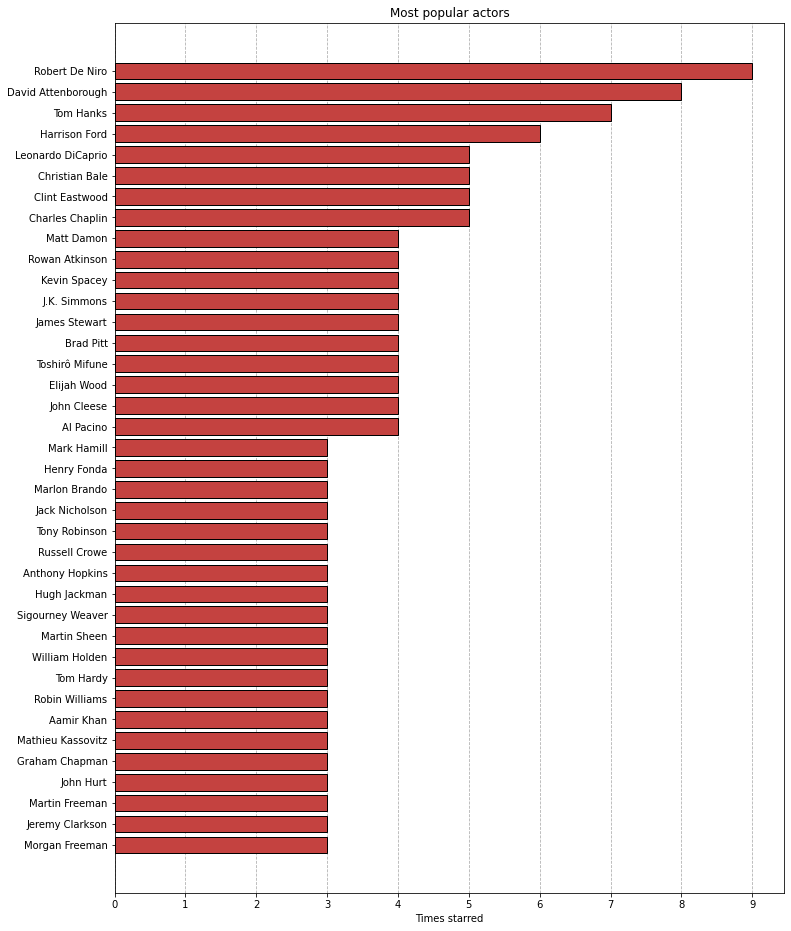

In [284]:
less = actors.loc[actors["starred"] > 2].sort_values(by="starred")

fig, ax = plt.subplots(figsize=(12, 16))

ax.grid(which="major", axis="x", linestyle="--", zorder=0)
ax.barh(less["actor"], less["starred"], zorder=3, color="#c44240", edgecolor="black")

ax.set_xticks(ticks=np.arange(actors["starred"].max() + 1))
ax.set_title("Most popular actors")
ax.set_xlabel("Times starred")

### Most popular film directors  
___

An almost identical process is used  
Only movies have a director logged, so shows are dropped for this

In [285]:
movies = df.loc[df["category"] == "Movie"]
directors = dict.fromkeys(list(df["director"].unique()), 0)

Each movie has a single director

In [286]:
for director in movies["director"]:
    directors[director] += 1

In [287]:
directors = pd.DataFrame({keys:[values] for keys, values in directors.items()})
directors

,Frank Darabont,Francis Ford Coppola,Christopher Nolan,Sidney Lumet,Steven Spielberg,Peter Jackson,Quentin Tarantino,Sergio Leone,Robert Zemeckis,David Fincher,...,Terry Jones,François Truffaut,Mathieu Kassovitz,Ron Clements,T.J. Gnanavel,Gary Trousdale,Richard Attenborough,Tate Taylor,Richard Kelly,-
0,2,3,7,2,7,3,5,4,2,3,...,1,1,1,1,1,1,1,1,1,0


In [288]:
directors = pd.melt(directors)
directors.columns = ["director", "films"]
directors.head()

,director,films
0,Frank Darabont,2
1,Francis Ford Coppola,3
2,Christopher Nolan,7
3,Sidney Lumet,2
4,Steven Spielberg,7


Text(0.5, 0, 'Films made')

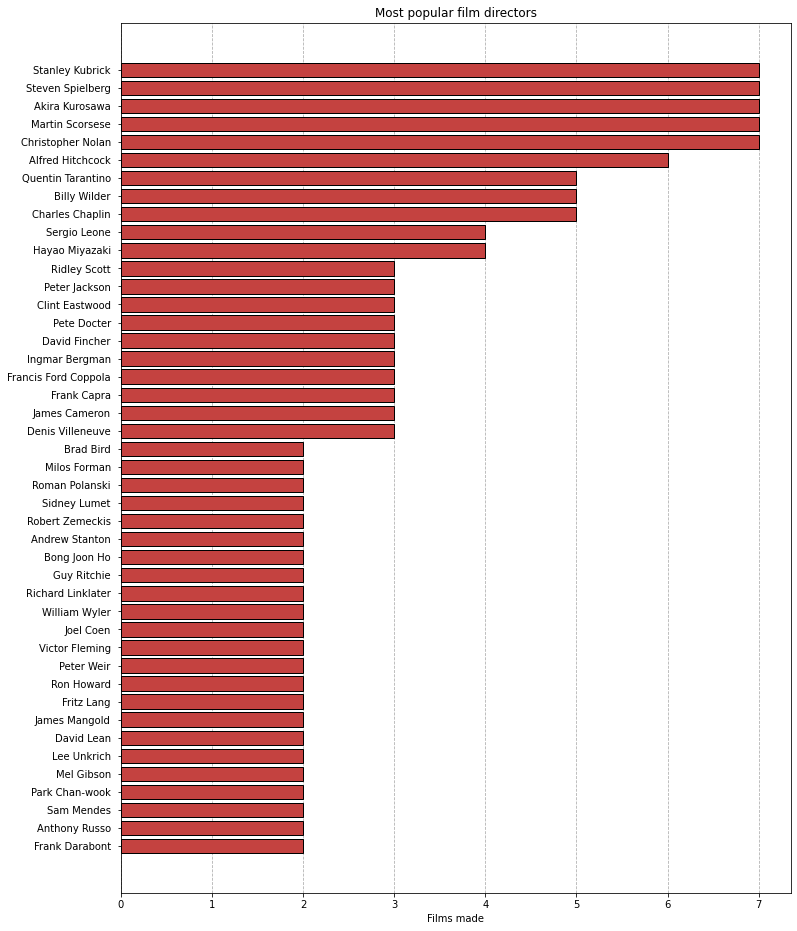

In [289]:
less = directors.loc[directors["films"] > 1].sort_values(by="films")

fig, ax = plt.subplots(figsize=(12, 16))

ax.grid(which="major", axis="x", linestyle="--", zorder=0)
ax.barh(less["director"], less["films"], zorder=3, color="#c44240", edgecolor="black")

ax.set_xticks(ticks=np.arange(directors["films"].max() + 1))
ax.set_title("Most popular film directors")
ax.set_xlabel("Films made")

___

Are older titles rated by more users? If it's true, are there newer titles with exceptionally high amount of users ratings?

In [290]:
yeargroup = df.groupby("year")
mean_users_rated = yeargroup["users_rated"].mean()
mean_users_rated

year
1921    123367.000000
1924     47781.000000
1925    108819.000000
1926     89027.000000
1927    170231.000000
            ...      
2017    215568.066667
2018    208802.076923
2019    287379.809524
2020    115421.600000
2021    167058.250000
Name: users_rated, Length: 87, dtype: float64

A fitted line will make the answer to this question more transparent

In [291]:
slope, intercept, *_rest = scipy.stats.linregress(x=mean_users_rated.index, y=mean_users_rated)

Text(0, 0.5, 'Users rated')

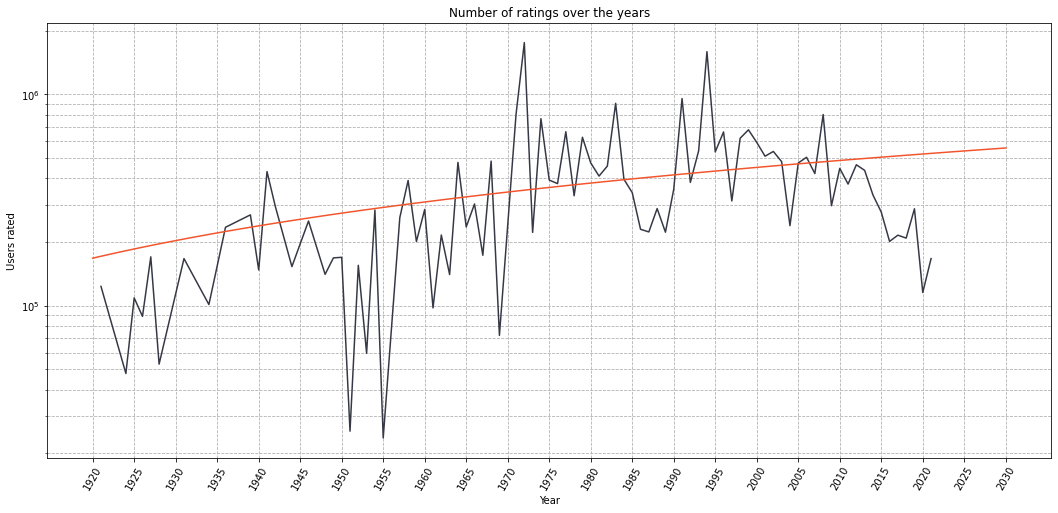

In [292]:
mean_users_rated.plot(figsize=(18, 8), color="#363945")

plt.grid(which="both", linestyle="--")
plt.plot(np.arange(1920, 2031), [slope * x + intercept for x in np.arange(1920, 2031)], color="#f2552c")

plt.xticks(ticks=np.arange(1920, 2031, 5), labels=np.arange(1920, 2031, 5), rotation=60)
plt.yscale("log")
plt.title("Number of ratings over the years")
plt.xlabel("Year")
plt.ylabel("Users rated")

- It seems likes newer titles have more user ratings  

This could be due to older titles being watched by older generations  
In this case which are the old tiles with several user ratings?

In [293]:
older_popular_titles = df.loc[ ( df["year"] < df["year"].quantile(0.25) ) & ( df["users_rated"] > df["users_rated"].quantile(0.75) ) ]

older_popular_titles.sort_values(by="users_rated", ascending=False).head(10)

,id,category,title,director,actors,rating,users_rated,year,url
1,68646,Movie,Ο νονός,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1756119,1972,https://www.imdb.com/title/tt0068646/
26,76759,Movie,Ο πόλεμος των άστρων,George Lucas,"Mark Hamill, Harrison Ford",8.6,1308290,1977,https://www.imdb.com/title/tt0076759/
14,80684,Movie,Ο πόλεμος των άστρων: Επεισόδιο 5 - Η αυτοκρατ...,Irvin Kershner,"Mark Hamill, Harrison Ford",8.7,1236764,1980,https://www.imdb.com/title/tt0080684/
3,71562,Movie,"Ο νονός, μέρος 2ο",Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0,1217074,1974,https://www.imdb.com/title/tt0071562/
29,88763,Movie,Επιστροφή στο μέλλον,Robert Zemeckis,"Michael J. Fox, Christopher Lloyd",8.5,1146669,1985,https://www.imdb.com/title/tt0088763/
87,86190,Movie,Ο πόλεμος των άστρων: Επεισόδιο 6 - Η επιστροφ...,Richard Marquand,"Mark Hamill, Harrison Ford",8.3,1010972,1983,https://www.imdb.com/title/tt0086190/
17,73486,Movie,Στη φωλιά του κούκου,Milos Forman,"Jack Nicholson, Louise Fletcher",8.6,974820,1975,https://www.imdb.com/title/tt0073486/
60,81505,Movie,Η λάμψη,Stanley Kubrick,"Jack Nicholson, Shelley Duvall",8.4,973245,1980,https://www.imdb.com/title/tt0081505/
55,82971,Movie,Οι Κυνηγοί της Χαμένης Κιβωτού,Steven Spielberg,"Harrison Ford, Karen Allen",8.4,935907,1981,https://www.imdb.com/title/tt0082971/
49,78748,Movie,"Άλιεν, ο επιβάτης του διαστήματος",Ridley Scott,"Sigourney Weaver, Tom Skerritt",8.4,844770,1979,https://www.imdb.com/title/tt0078748/


# Exporting to Excel  
___

- Data is split between movies and shows. They'll be written in different sheets  
- The "category" column is dropped  
- Additionally, since only movies have a director, the "director" column from shows will be also dropped.  
- A third sheet will be produced, containing only the date the data was scraped

In [294]:
movies = df.loc[df["category"] == "Movie"].drop("category", axis="columns")
shows = df.loc[df["category"] == "Show"].drop(["category", "director"], axis="columns")

In [295]:
with open("imdb-titles.csv", "r", encoding="utf-8") as fp:
    date_scraped = fp.readline().lstrip("Data scraped on ").rstrip("\n")
date_scraped_sheet = pd.DataFrame({"Data Scraped on:": [date_scraped]})

In [296]:
with pd.ExcelWriter("imdb-titles.xlsx") as fp:
    movies.to_excel(fp, sheet_name="Movies", index=False)
    shows.to_excel(fp, sheet_name="Shows", index=False)
    date_scraped_sheet.to_excel(fp, sheet_name="Date Scraped", index=False)